In [37]:
import tensorflow_datasets as tfds
import numpy as np
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
voc = tfds.object_detection.Voc()

In [3]:
voc.download_and_prepare()

In [17]:
datasets = voc.as_dataset()
train_dataset, test_dataset = datasets['train'], datasets['test']

In [21]:
X_train = None
for train in tqdm(tfds.as_numpy(train_dataset)): 
    if X_train is None:  
        X_train = cv2.resize(train['image'], (128,128), interpolation= cv2.INTER_LINEAR)
        X_train = np.expand_dims(X_train, axis=0)
    else:
        aux = cv2.resize(train['image'], (128,128), interpolation= cv2.INTER_LINEAR)
        X_train = np.concatenate([X_train, np.expand_dims(aux, axis=0)], axis=0)


  0%|          | 0/2501 [00:00<?, ?it/s]

In [24]:
X_test = None
for test in tqdm(tfds.as_numpy(test_dataset)): 
    if X_test is None:  
        X_test = cv2.resize(test['image'], (128,128), interpolation= cv2.INTER_LINEAR)
        X_test = np.expand_dims(X_test, axis=0)
    else:
        aux = cv2.resize(test['image'], (128,128), interpolation= cv2.INTER_LINEAR)
        X_test = np.concatenate([X_test, np.expand_dims(aux, axis=0)], axis=0)

  0%|          | 0/4952 [00:00<?, ?it/s]

In [26]:
X_test.shape

(4952, 128, 128, 3)

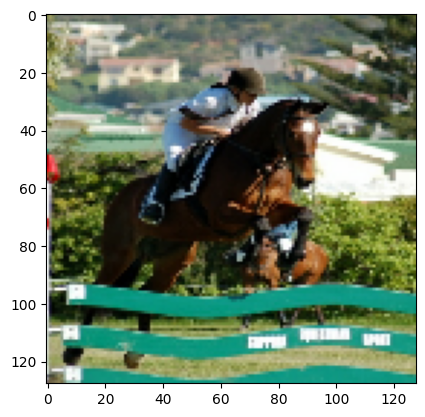

In [34]:
plt.imshow(X_train[0])

In [42]:
for idx, image in tqdm(enumerate(X_train)):
    cv2.imwrite(f"./data/voc/train/IMG_{idx}.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]

In [43]:
for idx, image in tqdm(enumerate(X_test)):
    cv2.imwrite(f"./data/voc/tester/IMG_{idx}.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]